## Exercise 2

In this exercise, we will plot COVID hospital admissions in the UK from March 2020 to February 2023, and you will fit an exponential curve to understand the rise in hospital admissions in a three week period from late December 2021 to early January 2022.   

 The data is in a file called `hospital_cases_2023-02-16.csv` (comma-separated-values format). It was downloaded from the official [website](https://coronavirus.data.gov.uk/) for UK COVID-19 data.


In [2]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use `pandas`, a library for data analysis in Python to load and view the data. Pandas uses a structure called a _data frame_ to represent and manipulate data tables. All the required commands are included here, so you won't need to learn Pandas for this exercise. But if you are interested in learning more, [this](https://pandas.pydata.org/docs/) is a good place to start.

In [4]:
df_hosp = pd.read_csv('hospital_cases_2023-02-16.csv')  # Create a data frame by loading data from a csv file
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/hospital_cases_2023-02-16.csv'

df_hosp.head(3)   #display the first three rows

,date,hospitalCases
0,27/03/2020,7267
1,28/03/2020,8278
2,29/03/2020,9525


The command `pd.read_csv` loads the data onto a data frame. We have used the `.head()` command to display the top 3 rows of the data frame.

We can also display a random sample of rows from the data frame using `.sample()`, or the last few rows using `.tail()`.

In [5]:
df_hosp.tail(3)

,date,hospitalCases
1045,05/02/2023,7647
1046,06/02/2023,7795
1047,07/02/2023,7737


You can plot one column against another by just using their column names. Let us plot the `hospitalCases` column versus date.

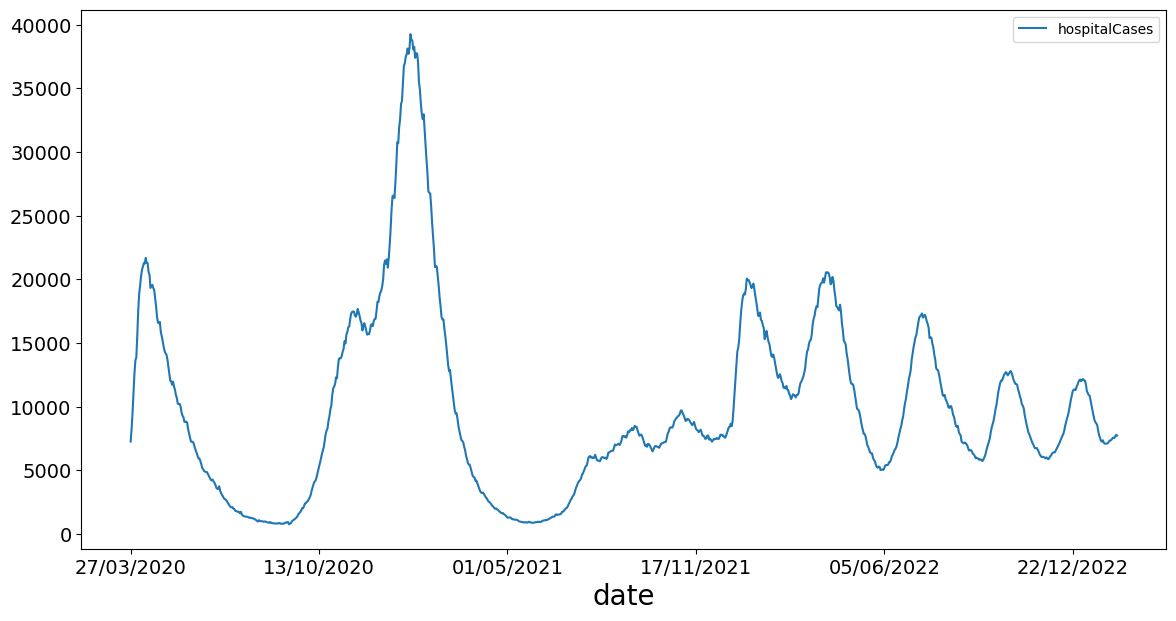

In [6]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

df_hosp.plot(x='date', y='hospitalCases')
plt.show()

Observe the sharp increase in hospital admissions corresponding to each wave; also notice that the peaks after mid-2021 are smaller (due to the vaccines). We now extract the rows spanning a three week period starting 22 December 2021 (when Omicron first spread in the UK) into a data frame called `df_part`

In [7]:
df_part = df_hosp[635:656]
df_part.head(2)

,date,hospitalCases
635,22/12/2021,8400
636,23/12/2021,8436


In [8]:
df_part.tail(2)

,date,hospitalCases
654,10/01/2022,20065
655,11/01/2022,19967


We now convert the `hospitalCases` column to a numpy array `yvals`

In [9]:
yvals = np.array(df_part['hospitalCases'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

## 2a) Plot the data `yvals` vs `xvals` in a scatterplot

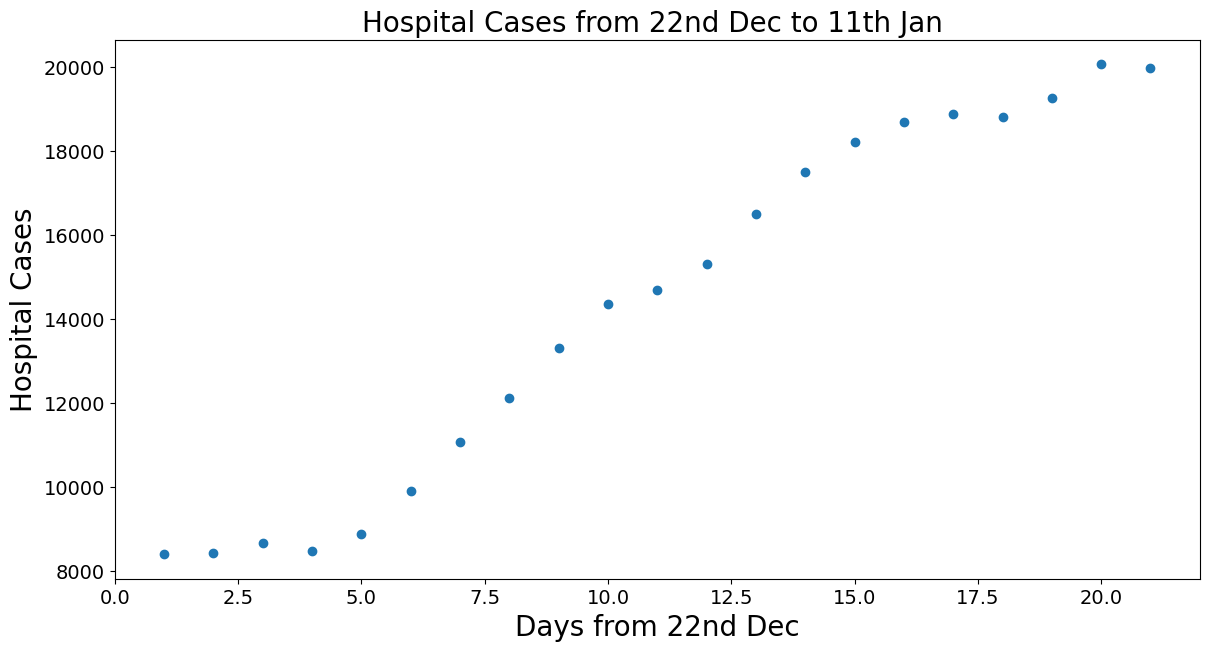

In [10]:
# Your code for scatterplot here
plt.scatter(xvals, yvals)
plt.xlabel("Days from 22nd Dec")
plt.ylabel("Hospital Cases")
plt.title("Hospital Cases from 22nd Dec to 11th Jan ")
plt.show()

## 2b) Fit an exponential model to the data 

From our knowledge of how the virus spreads, we know that the number of infections, hospital admissions etc. should (roughly) follow an exponential curve. We would therefore like to fit a model of the form $y = c_1 e^{c_2 x}$, where $y$ is the number of admissions on day $x$. 

Note that this is a linear model on a log-scale for $y$. That is, $\log y = \log c_1 +  c_2 x$.

- Fit a linear model for $\log(\text{yvals})$ vs $\text{xvals}$, and print the values of $c_1$ and $c_2$
- Plot the fit $y = c_1 e^{c_2x}$ along with the scatterplot of the data

C1 = 7754.298, C2 = 0.052


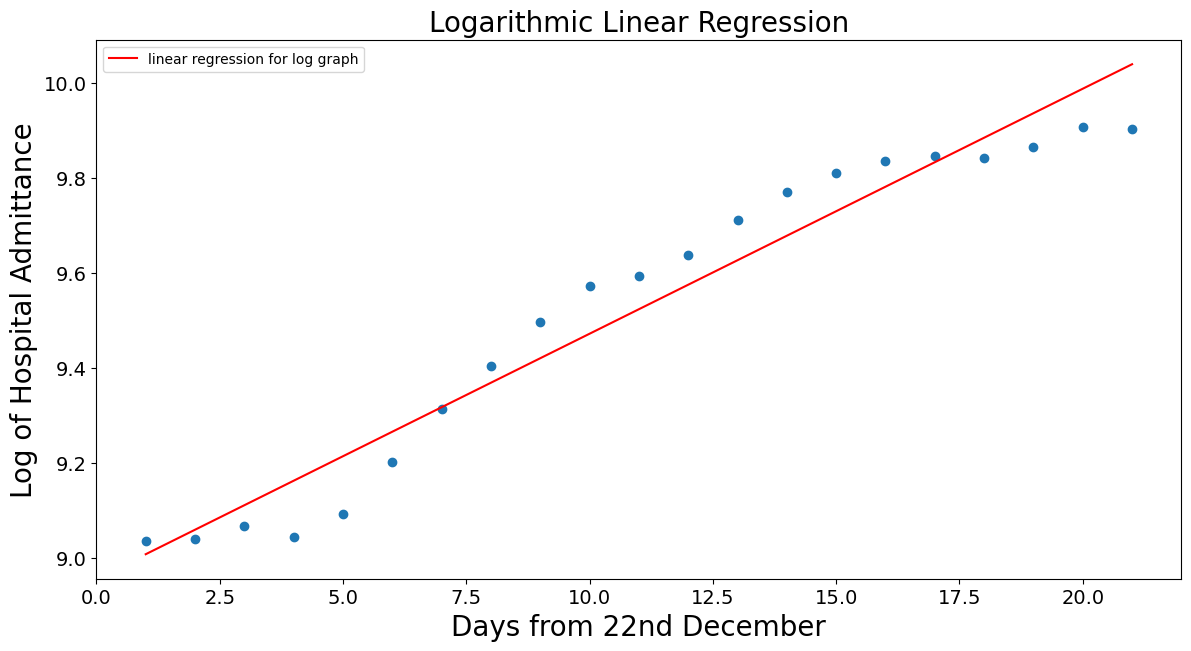

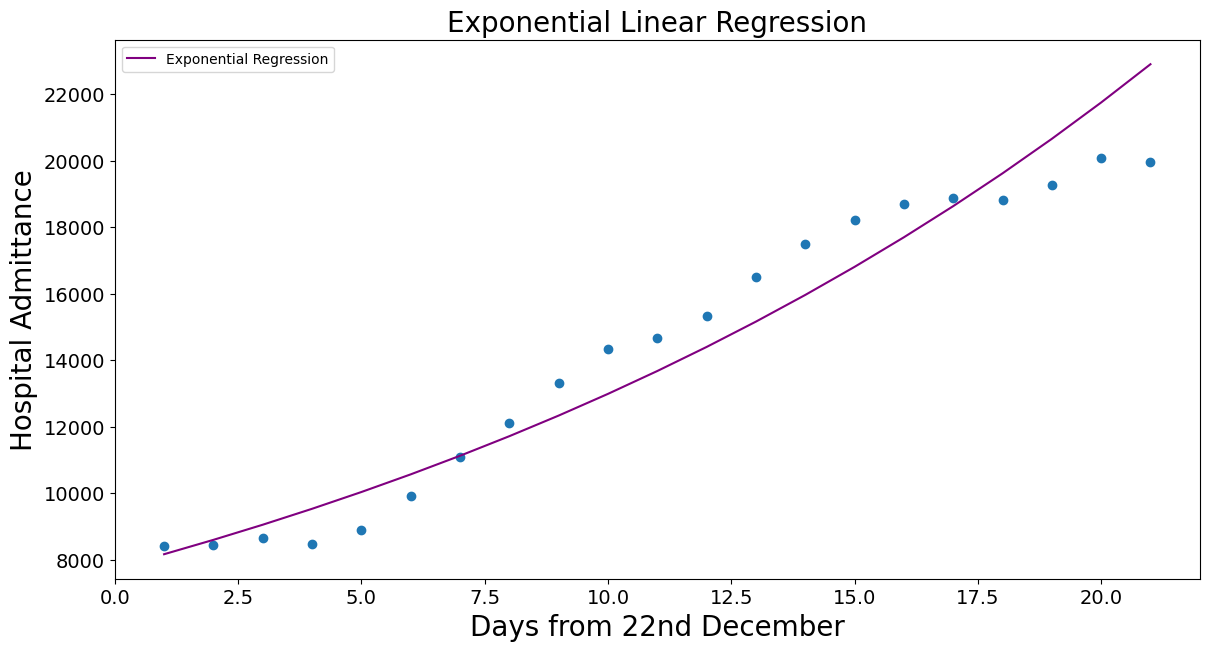

In [18]:
# Create the log array of the y values & use polyfit to find the linear fit
logy = np.log(yvals)
all_ones = np.ones((N, 1))
X = np.column_stack((all_ones, xvals))
XT = X.T
fit = np.linalg.inv(XT.dot(X)).dot(XT).dot(logy)

# After having printed the "fit" variable, I created the yfit variable, which is the linear regression.
yfit = fit[1]*xvals + fit[0]

# Hence C_1 = e**3.889, C_2 = 0.0224
C1 = np.exp(fit[0])
C2 = fit[1]

print(f"C1 = {C1:.3f}, C2 = {C2:.3f}")

# To help visualise the data
plt.scatter(xvals, logy)
plt.plot(xvals, yfit, color = "red", label = "linear regression for log graph")
plt.ylabel("Log of Hospital Admittance")
plt.xlabel("Days from 22nd December")
plt.title("Logarithmic Linear Regression")
plt.legend()
plt.show()

# Plot the original graph with the exponential regression
y = C1 * np.exp(C2 * xvals)
plt.plot(xvals, y, label = 'Exponential Regression', color = "purple")
plt.scatter(xvals, yvals)
plt.ylabel("Hospital Admittance")
plt.xlabel("Days from 22nd December")
plt.title("Exponential Linear Regression")
plt.legend()
plt.show()

## 2c) Estimate the weekly growth rate in hospital admissions (in \%) over this period

_Hint_ : According to the model, admissions increase every 7 days by a factor of 
$(c_1 e^{c_2 (x+7)})/(c_1 e^{c_2 x}) = e^{7c_2}$.

In [12]:
# compute and print weekly growth rate (in %)
growth_rate = (np.exp(7*C2)-1)*100
print(f"The weekly growth rate as estimated by the exponential model is {growth_rate.round(3)} %")

The weekly growth rate as estimated by the exponential model is 43.471 %
